### Why RFM?
- RFM (Recency, Frequency, Monetary) analysis is a marketing model using customer segmentation based on their transaction history.
- This model could be very useful, especially for small and medium-sized enterprises (SMEs) with limited marketing resources, helping them focus on the potentially right customer segments to increase ROI, reduce churn, reduce cost, improve customer relationship, and a lot more.

### How?
- In RFM analysis, customers are scored based on three factors (Recency - how recently, Frequency - how often, Monetary - how much), then labeled based on the combination of RFM scores.

### Reference:
- https://www.putler.com/rfm-analysis

### This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

- **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a cancellation. 
- **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- **Description**: Product (item) name. Nominal.
- **Quantity**: The quantities of each product (item) per transaction. Numeric.	
- **InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.
- **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
- **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- **Country**: Country name. Nominal, the name of the country where each customer resides.

In [98]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import squarify

import warnings
warnings.filterwarnings('ignore')

In [99]:
# data = pd.read_csv('ecommerce retail.csv', encoding = 'ISO-8859-1')
data = pd.read_excel('ecommerce retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [100]:
print('Dataframe dimension: ', data.shape)

Dataframe dimension:  (541909, 8)


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [102]:
# with the available data and context, it is impossible to impute values for ~140k rows where CustomerID is null. Therefore,
# we delete these rows from the dataframe in this situation; we also drop duplicate rows in this step

data = data.dropna(subset=['CustomerID'], axis=0).drop_duplicates()
print('Dataframe dimension after dropping null CustomerIDs and duplicate rows: ', data.shape)

Dataframe dimension after dropping null CustomerIDs and duplicate rows:  (401604, 8)


In [103]:
# convert some columns to the potentially correct data type

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['CustomerID'] = data['CustomerID'].astype(int)

In [104]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [106]:
cancelled = data[data['Quantity'] < 0]
# cancelled transactions can also be filtered by InvoiceNo starting with letter "C"

cancelled['Loss'] = cancelled['Quantity'] * cancelled['UnitPrice']
cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Loss
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25


In [145]:
agg_cancelled = cancelled.groupby(['InvoiceNo', 'Country', 'CustomerID']).agg({'InvoiceDate': 'max',
                                                                               'Loss': 'sum'}).reset_index()
agg_cancelled

,InvoiceNo,Country,CustomerID,InvoiceDate,Loss
0,C536379,United Kingdom,14527,2010-12-01 09:41:00,-27.50
1,C536383,United Kingdom,15311,2010-12-01 09:49:00,-4.65
2,C536391,United Kingdom,17548,2010-12-01 10:24:00,-141.48
3,C536506,United Kingdom,17897,2010-12-01 12:38:00,-25.50
4,C536543,United Kingdom,17841,2010-12-01 14:30:00,-3.80
...,...,...,...,...,...
3649,C581484,United Kingdom,16446,2011-12-09 09:27:00,-168469.60
3650,C581490,United Kingdom,14397,2011-12-09 09:57:00,-32.53
3651,C581499,United Kingdom,15498,2011-12-09 10:28:00,-224.69
3652,C581568,United Kingdom,15311,2011-12-09 11:57:00,-54.75


In [146]:
delivered = data[data['Quantity'] >= 0]
delivered['InvoiceNo'] = delivered['InvoiceNo'].astype(int)
delivered['Revenue'] = delivered['Quantity'] * delivered['UnitPrice']
delivered

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [147]:
agg_delivered = delivered.groupby(['InvoiceNo', 'Country', 'CustomerID']).agg({'InvoiceDate': 'max',
                                                                              'Revenue': 'sum'}).reset_index()
agg_delivered

,InvoiceNo,Country,CustomerID,InvoiceDate,Revenue
0,536365,United Kingdom,17850,2010-12-01 08:26:00,139.12
1,536366,United Kingdom,17850,2010-12-01 08:28:00,22.20
2,536367,United Kingdom,13047,2010-12-01 08:34:00,278.73
3,536368,United Kingdom,13047,2010-12-01 08:34:00,70.05
4,536369,United Kingdom,13047,2010-12-01 08:35:00,17.85
...,...,...,...,...,...
18531,581583,United Kingdom,13777,2011-12-09 12:23:00,124.60
18532,581584,United Kingdom,13777,2011-12-09 12:25:00,140.64
18533,581585,United Kingdom,15804,2011-12-09 12:31:00,329.05
18534,581586,United Kingdom,13113,2011-12-09 12:49:00,339.20


In [148]:
agg_delivered.describe()

,InvoiceNo,CustomerID,Revenue
count,18536.000000,18536.000000,18536.000000
mean,559527.999407,15266.224158,479.456673
std,13040.283892,1734.178524,1677.916285
min,536365.000000,12346.000000,0.000000
25%,548352.500000,13773.500000,157.200000
50%,559818.500000,15176.500000,302.565000
75%,570834.500000,16779.000000,469.467500
max,581587.000000,18287.000000,168469.600000


In [149]:
print('Number of cancelled transactions: {:.2f}%'.format(agg_cancelled.shape[0] * 100
                                                        /(agg_cancelled.shape[0] + agg_delivered.shape[0])))

# the quantity of cancellations is pretty large

Number of cancelled transactions: 16.47%


In [150]:
today = datetime.datetime.strptime('2011-12-31', '%Y-%m-%d')
today

datetime.datetime(2011, 12, 31, 0, 0)

In [151]:
x = agg_delivered[['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Revenue']]
rfm = x.groupby('CustomerID').agg({'InvoiceDate': 'max', 'InvoiceNo': 'count', 'Revenue': 'sum'}).reset_index()
rfm.columns = ['CustomerID', 'Max_date', 'Frequency', 'Monetary']
rfm['Recency'] = (today - rfm['Max_date']).dt.days
rfm = rfm.drop('Max_date', axis=1)
rfm

,CustomerID,Frequency,Monetary,Recency
0,12346,1,77183.60,346
1,12347,7,4310.00,23
2,12348,4,1797.24,96
3,12349,1,1757.55,39
4,12350,1,334.40,331
...,...,...,...,...
4334,18280,1,180.60,298
4335,18281,1,80.82,201
4336,18282,2,178.05,28
4337,18283,16,2045.53,24


In [152]:
r_labels, f_labels, m_labels = range(5, 0, -1), range(1, 6), range(1, 6)

rfm['R_score'] = pd.qcut(rfm['Recency'], q=5, labels=r_labels)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=False) + 1
rfm['M_score'] = pd.qcut(rfm['Monetary'], q=5, labels=m_labels)

rfm

,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score
0,12346,1,77183.60,346,1,1,5
1,12347,7,4310.00,23,5,5,5
2,12348,4,1797.24,96,2,4,4
3,12349,1,1757.55,39,4,1,4
4,12350,1,334.40,331,1,1,2
...,...,...,...,...,...,...,...
4334,18280,1,180.60,298,1,2,1
4335,18281,1,80.82,201,1,2,1
4336,18282,2,178.05,28,5,3,1
4337,18283,16,2045.53,24,5,5,4


In [153]:
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm['RFM_Score'] = rfm['RFM_Score'].astype(int)
rfm

,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_Score
0,12346,1,77183.60,346,1,1,5,115
1,12347,7,4310.00,23,5,5,5,555
2,12348,4,1797.24,96,2,4,4,244
3,12349,1,1757.55,39,4,1,4,414
4,12350,1,334.40,331,1,1,2,112
...,...,...,...,...,...,...,...,...
4334,18280,1,180.60,298,1,2,1,121
4335,18281,1,80.82,201,1,2,1,121
4336,18282,2,178.05,28,5,3,1,531
4337,18283,16,2045.53,24,5,5,4,554


In [154]:
seg = pd.read_excel('ecommerce retail.xlsx', sheet_name='Segmentation')
seg.columns = [col.replace(' ', '_') for col in seg.columns]
seg

,Segment,RFM_Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [155]:
# convert comma-separated string to a list of rfm scores

seg['RFM_Score'] = seg['RFM_Score'].str.split(',')
seg = seg.explode('RFM_Score').reset_index(drop=True)
seg['RFM_Score'] = seg['RFM_Score'].astype(int)
seg.sort_values(by='RFM_Score')
seg

,Segment,RFM_Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [156]:
joined = rfm.merge(seg, how='left', on='RFM_Score')
joined

,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_Score,Segment
0,12346,1,77183.60,346,1,1,5,115,Cannot Lose Them
1,12347,7,4310.00,23,5,5,5,555,Champions
2,12348,4,1797.24,96,2,4,4,244,At Risk
3,12349,1,1757.55,39,4,1,4,414,Promising
4,12350,1,334.40,331,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
4334,18280,1,180.60,298,1,2,1,121,Lost customers
4335,18281,1,80.82,201,1,2,1,121,Lost customers
4336,18282,2,178.05,28,5,3,1,531,Potential Loyalist
4337,18283,16,2045.53,24,5,5,4,554,Champions


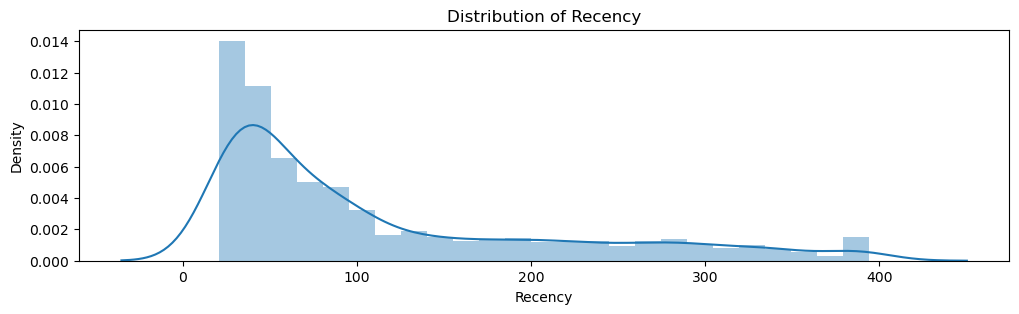

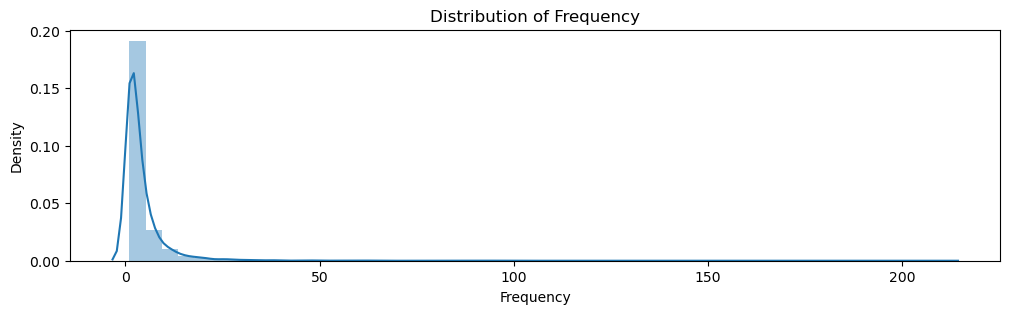

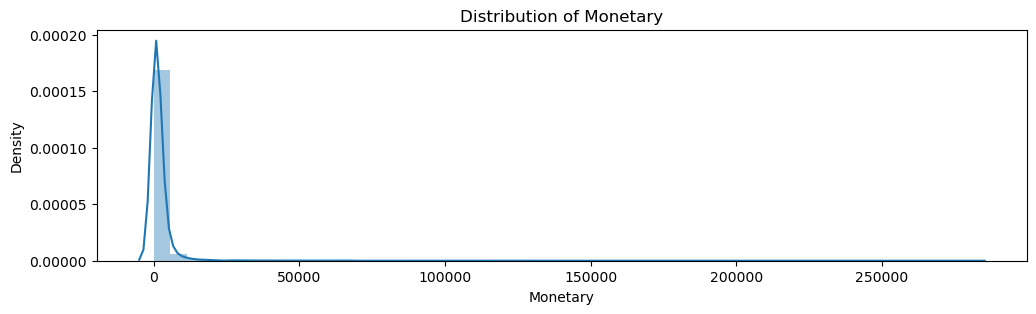

In [157]:
# show distribution of each variable of the model

colnames = ['Recency', 'Frequency', 'Monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(joined[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

In [158]:
grp = joined.groupby('Segment').agg({'CustomerID': 'count',
                                     'Monetary': 'sum',
                                     'Recency': 'mean'}).reset_index()
grp.columns = ['Segment', 'Cust_count', 'Total_monetary', 'Avg_recency']
grp.sort_values(by='Cust_count', ascending=False, inplace=True)
grp

,Segment,Cust_count,Total_monetary,Avg_recency
3,Champions,834,5591628.710,31.841727
4,Hibernating customers,693,282747.332,170.591631
5,Lost customers,484,96341.980,296.016529
6,Loyal,427,1016384.900,57.025761
1,At Risk,424,750887.431,164.445755
9,Potential Loyalist,411,221408.990,47.282238
0,About To Sleep,286,78743.090,106.954545
7,Need Attention,286,466255.331,53.979021
8,New Customers,269,59674.930,48.776952
10,Promising,133,119099.520,45.654135


In [159]:
grp['Count_share'] = grp['Cust_count'] / grp['Cust_count'].sum()
grp['Monetary_share'] = grp['Total_monetary'] / grp['Total_monetary'].sum()
grp

,Segment,Cust_count,Total_monetary,Avg_recency,Count_share,Monetary_share
3,Champions,834,5591628.710,31.841727,0.192210,0.629177
4,Hibernating customers,693,282747.332,170.591631,0.159714,0.031815
5,Lost customers,484,96341.980,296.016529,0.111546,0.010841
6,Loyal,427,1016384.900,57.025761,0.098410,0.114365
1,At Risk,424,750887.431,164.445755,0.097718,0.084491
9,Potential Loyalist,411,221408.990,47.282238,0.094722,0.024913
0,About To Sleep,286,78743.090,106.954545,0.065914,0.008860
7,Need Attention,286,466255.331,53.979021,0.065914,0.052464
8,New Customers,269,59674.930,48.776952,0.061996,0.006715
10,Promising,133,119099.520,45.654135,0.030652,0.013401


### Definition and recommended action for each customer segment:

| Segment | Characteristics | Recommendation |
| :-: | :-: | :-: |
| Champions | Bought recently, buy often and spend the most! | Reward them. Can be early adopters for new products. Will promote your brand. |
| Loyal | Spend good money with us often. Responsive to promotions. | Upsell higher value products. Ask for reviews. Engage them. |
| Potential Loyalist | Recent customers, but spent a good amount and bought more than once. | Offer membership / loyalty program, recommend other products. |
| New customers | Bought most recently, but not often. | Provide on-boarding support, give them early success, start building relationship. |
| Promising | Recent shoppers, but haven’t spent much. | Create brand awareness, offer free trials |
| Need attention | Above average recency, frequency and monetary values. May not have bought very recently though. | Make limited time offers, Recommend based on past purchases. Reactivate them. |
| About to sleep | Below average recency, frequency and monetary values. Will lose them if not reactivated. | Share valuable resources, recommend popular products / renewals at discount, reconnect with them. |
| At risk | Spent big money and purchased often. But long time ago. Need to bring them back! | Send personalized emails to reconnect, offer renewals, provide helpful resources. |
| Cannot lose them | Made biggest purchases, and often. But haven’t returned for a long time. | Win them back via renewals or newer products, don’t lose them to competition, talk to them. |
| Hibernating customers | Last purchase was long back, low spenders and low number of orders. | Offer other relevant products and special discounts. Recreate brand value. |
| Lost customers | Lowest recency, frequency and monetary scores. | Revive interest with reach out campaign, ignore otherwise. |

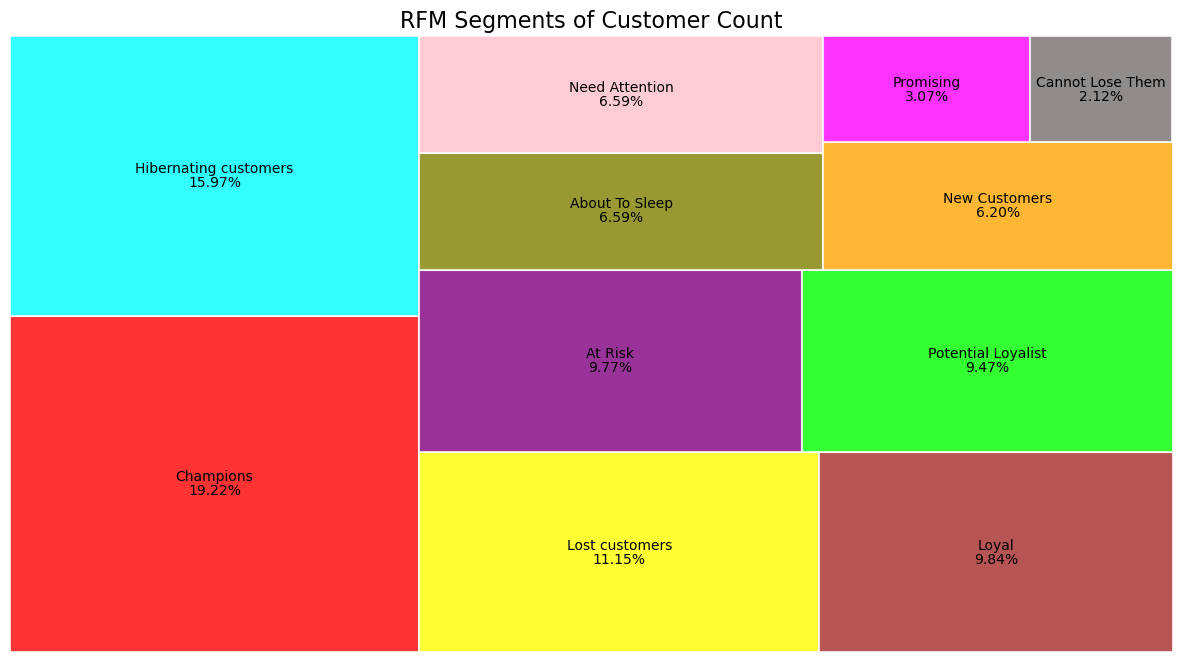

In [160]:
colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes=grp['Cust_count'], 
              label=grp['Segment'],
              value=[f'{x*100:.2f}%' for x in grp['Count_share']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
             )
plt.title('RFM Segments of Customer Count', fontsize=16)
plt.axis('off')
plt.show()

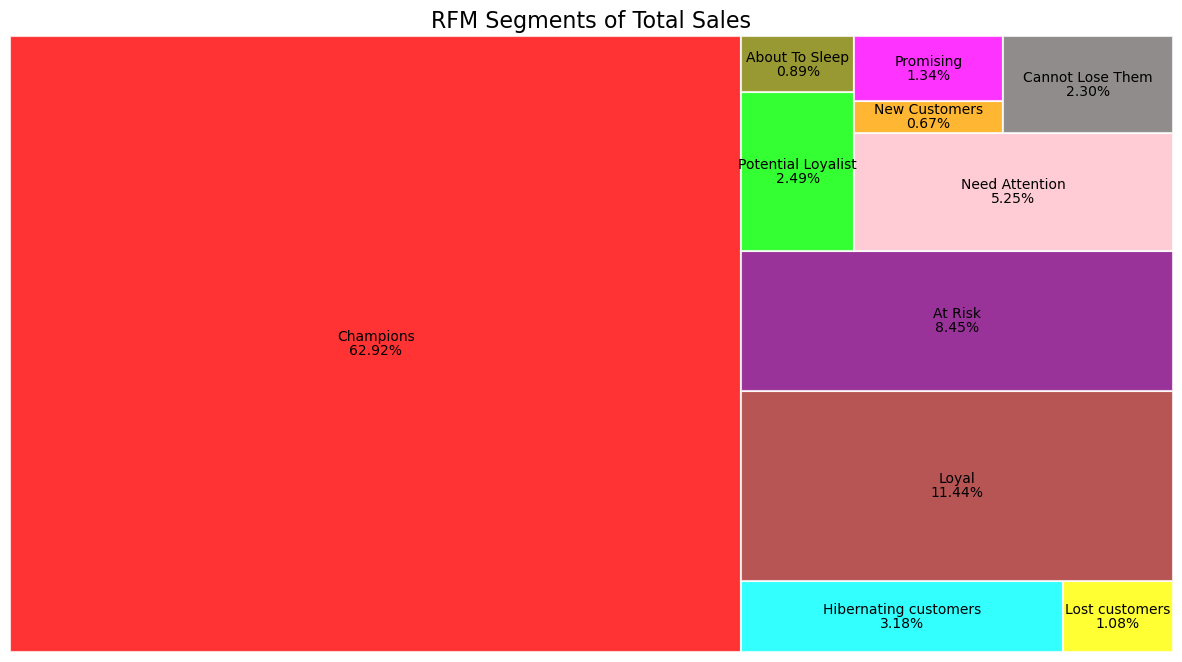

In [161]:
colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes=grp['Monetary_share'], 
              label=grp['Segment'],
              value=[f'{x*100:.2f}%' for x in grp['Monetary_share']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
             )
plt.title('RFM Segments of Total Sales', fontsize=16)
plt.axis('off')
plt.show()